# Système de maintenance prédictive pour les équipements 

In [3]:
#Régression Linéaire : Exp cas simple
# Importation des bibliothèques nécessaires :
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 



In [5]:
# Création des data neccessaires 
#Supposons que nous avons les heures de fonctionnement du
#moteur (X) et la durée de vie restante en heures (y).

In [17]:
# Heures de fonctionnement du moteur
X = np.array([[100], [200], [300], [400], [500], [600]])
# Durée de vie restante estimée du moteur
y = np.array([1500, 1300, 1100, 900, 700, 500])

In [23]:
# Entraînement du modèle 
# Création d'une instance de LinearRegression
model = LinearRegression()
# Entraînement du modèle
model.fit(X, y)

LinearRegression()

In [14]:
# Prediction

predicted_life = model.predict(np.array([[700]]))
print("Duree de vie restante prévue est : ", predicted_life)

Duree de vie restante prévue est :  [[300.]]


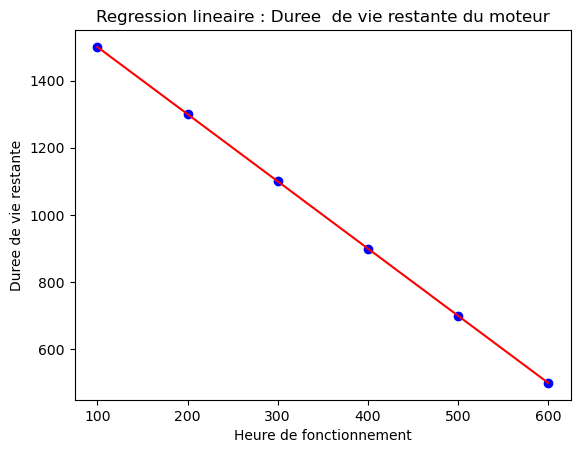

In [20]:
# Visualisation 

# Tracer la ligne de regression 

plt.scatter(X,y, color = 'blue') # Creation d'un nuage de points bleu où chaque point représente une observation. 
plt.plot(X,model.predict(X), color ='red') # calcule les valeurs prédites pour les points d'entrée donnés dans X.
plt.title('Regression lineaire : Duree  de vie restante du moteur')
plt.xlabel('Heure de fonctionnement')
plt.ylabel('Duree de vie restante')
plt.show()

In [21]:
# Régression Logistique : Exp de cas simple 

import numpy as np 
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt 


In [32]:
# On suppose qu'on a des données sur la température et les vibrations du moteur (X) et si une maintenance est nécessaire ou pas (y).
# Température (°C) et vibrations (mm/s), matrice 6X2
X = np.array([[80, 0.5], [90, 0.7], [85, 0.6], [100, 1.0], [75, 0.4], [60, 0.2]])
# 0 = pas de maintenance nécessaire, 1 = maintenance nécessaire
y = np.array([0, 0, 0, 1, 0, 0])

In [24]:
# Entraînement du modèle 
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [25]:
predicted_maintenance = model.predict(np.array([[94, 0.8]]))
print("Maintenance neccessaire : ", predicted_maintenance)

Maintenance neccessaire :  [0]


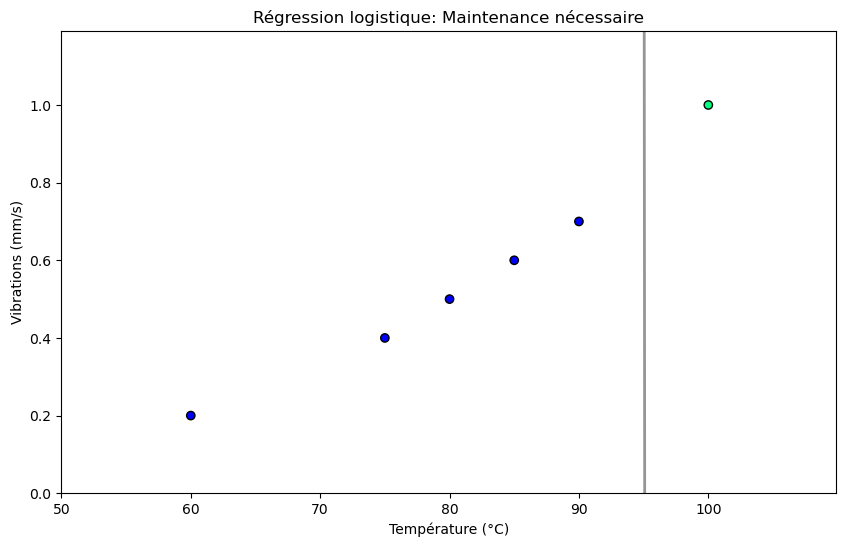

In [38]:
# Définir les bornes de la grille de visualisation
xx, yy = np.mgrid[50:110:0.1, 0:1.2:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# Calculer les probabilités de maintenance
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Tracer les points de données et la frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1, linewidths=2)
plt.title('Régression logistique: Maintenance nécessaire')
plt.xlabel('Température (°C)')
plt.ylabel('Vibrations (mm/s)')
plt.show()

In [36]:
print("Coefficients du modèle :", model.coef_)
print("Intercept du modèle :", model.intercept_)


Coefficients du modèle : [[0.57277701 0.01700624]]
Intercept du modèle : [-54.46081281]


État prédit (0:normal, 1:maintenance requise) :  1


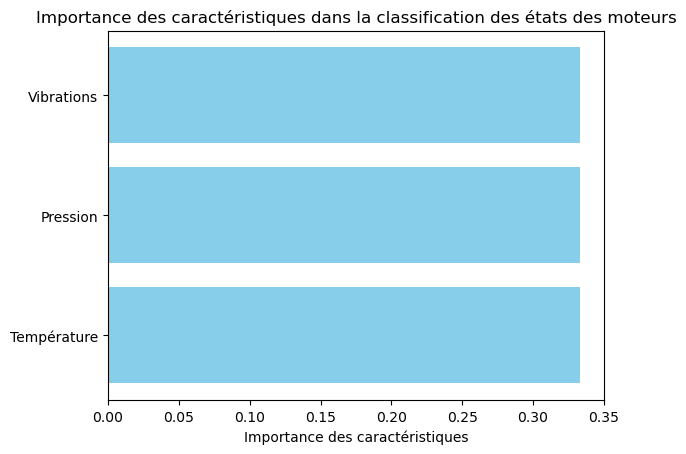

In [39]:
# Forêts Aléatoires : 

import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Caractéristiques: température (°C), pression (psi), vibrations (mm/s)
X = np.array([
    [85, 30, 0.5], [88, 28, 0.7], [90, 50, 1.5],
    [100, 45, 1.0], [95, 52, 1.3], [105, 55, 1.8]
])
# Étiquettes: 0 = normal, 1 = maintenance requise
y = np.array([0, 0, 1, 1, 1, 1])

# Créer une instance de RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)  # Utiliser 10 arbres dans la forêt
model.fit(X, y)

# Prédire l'état d'un moteur avec des caractéristiques données
new_data = np.array([[92, 40, 0.9]])
predicted_state = model.predict(new_data)
print("État prédit (0:normal, 1:maintenance requise) : ", predicted_state[0])

# Obtenir l'importance des caractéristiques
importances = model.feature_importances_
features = ['Température', 'Pression', 'Vibrations']
# Tracer les importances pour chaque caractéristique
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance des caractéristiques')
plt.title('Importance des caractéristiques dans la classification des états des moteurs')
plt.show()


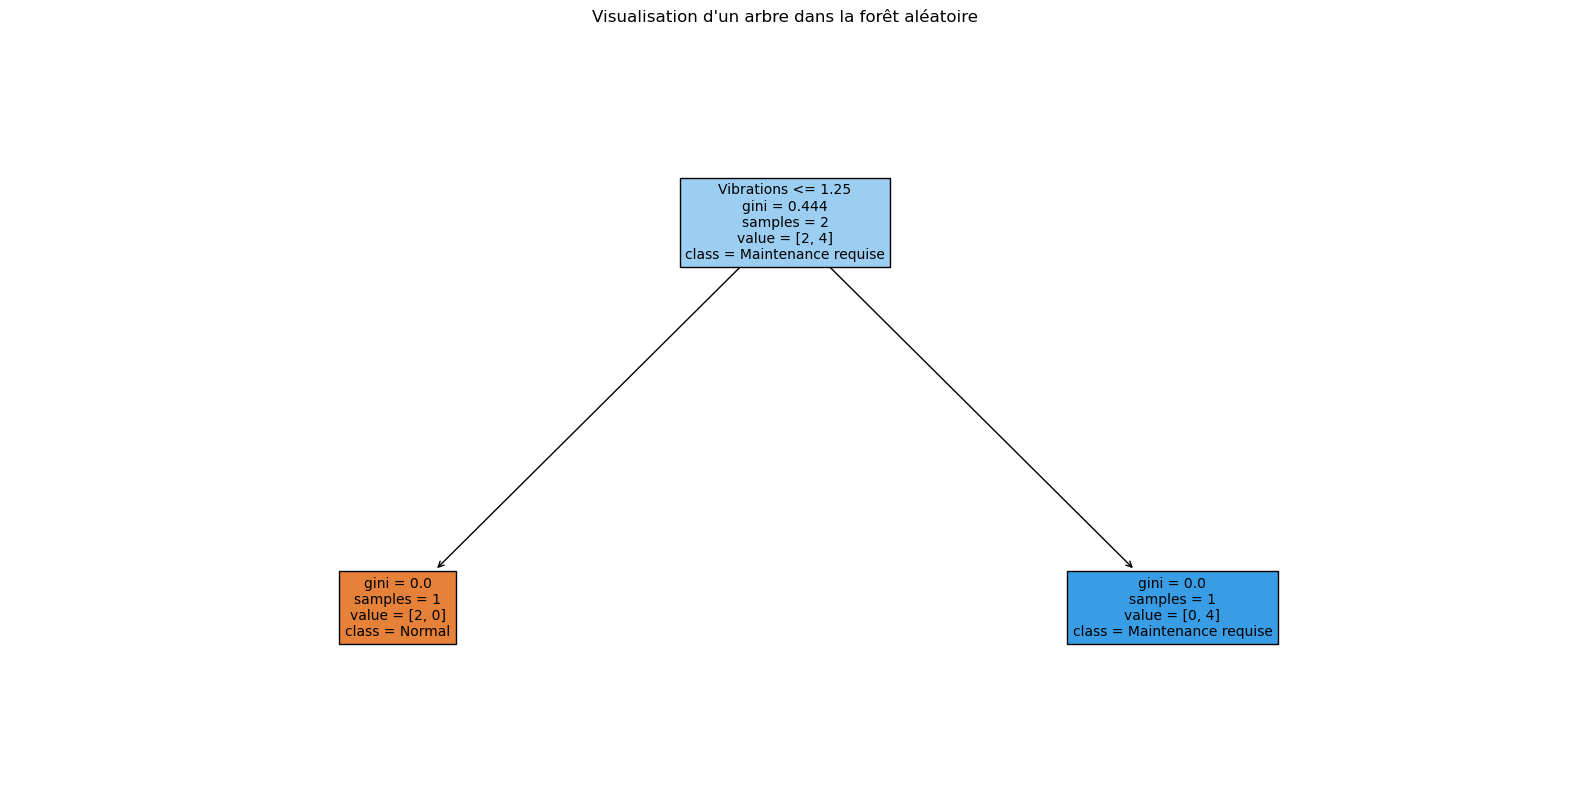

In [40]:
# visualiser un arbre individuel de la forêt pour mieux comprendre le processus de décision au niveau de cet arbre
from sklearn.tree import plot_tree

# Supposons que `model` est notre modèle RandomForest déjà entraîné
# Visualiser le premier arbre de la forêt
plt.figure(figsize=(20,10))
tree = plot_tree(model.estimators_[0], feature_names=['Température', 'Pression', 'Vibrations'], 
                 class_names=['Normal', 'Maintenance requise'], filled=True, fontsize=10)
plt.title('Visualisation d\'un arbre dans la forêt aléatoire')
plt.show()



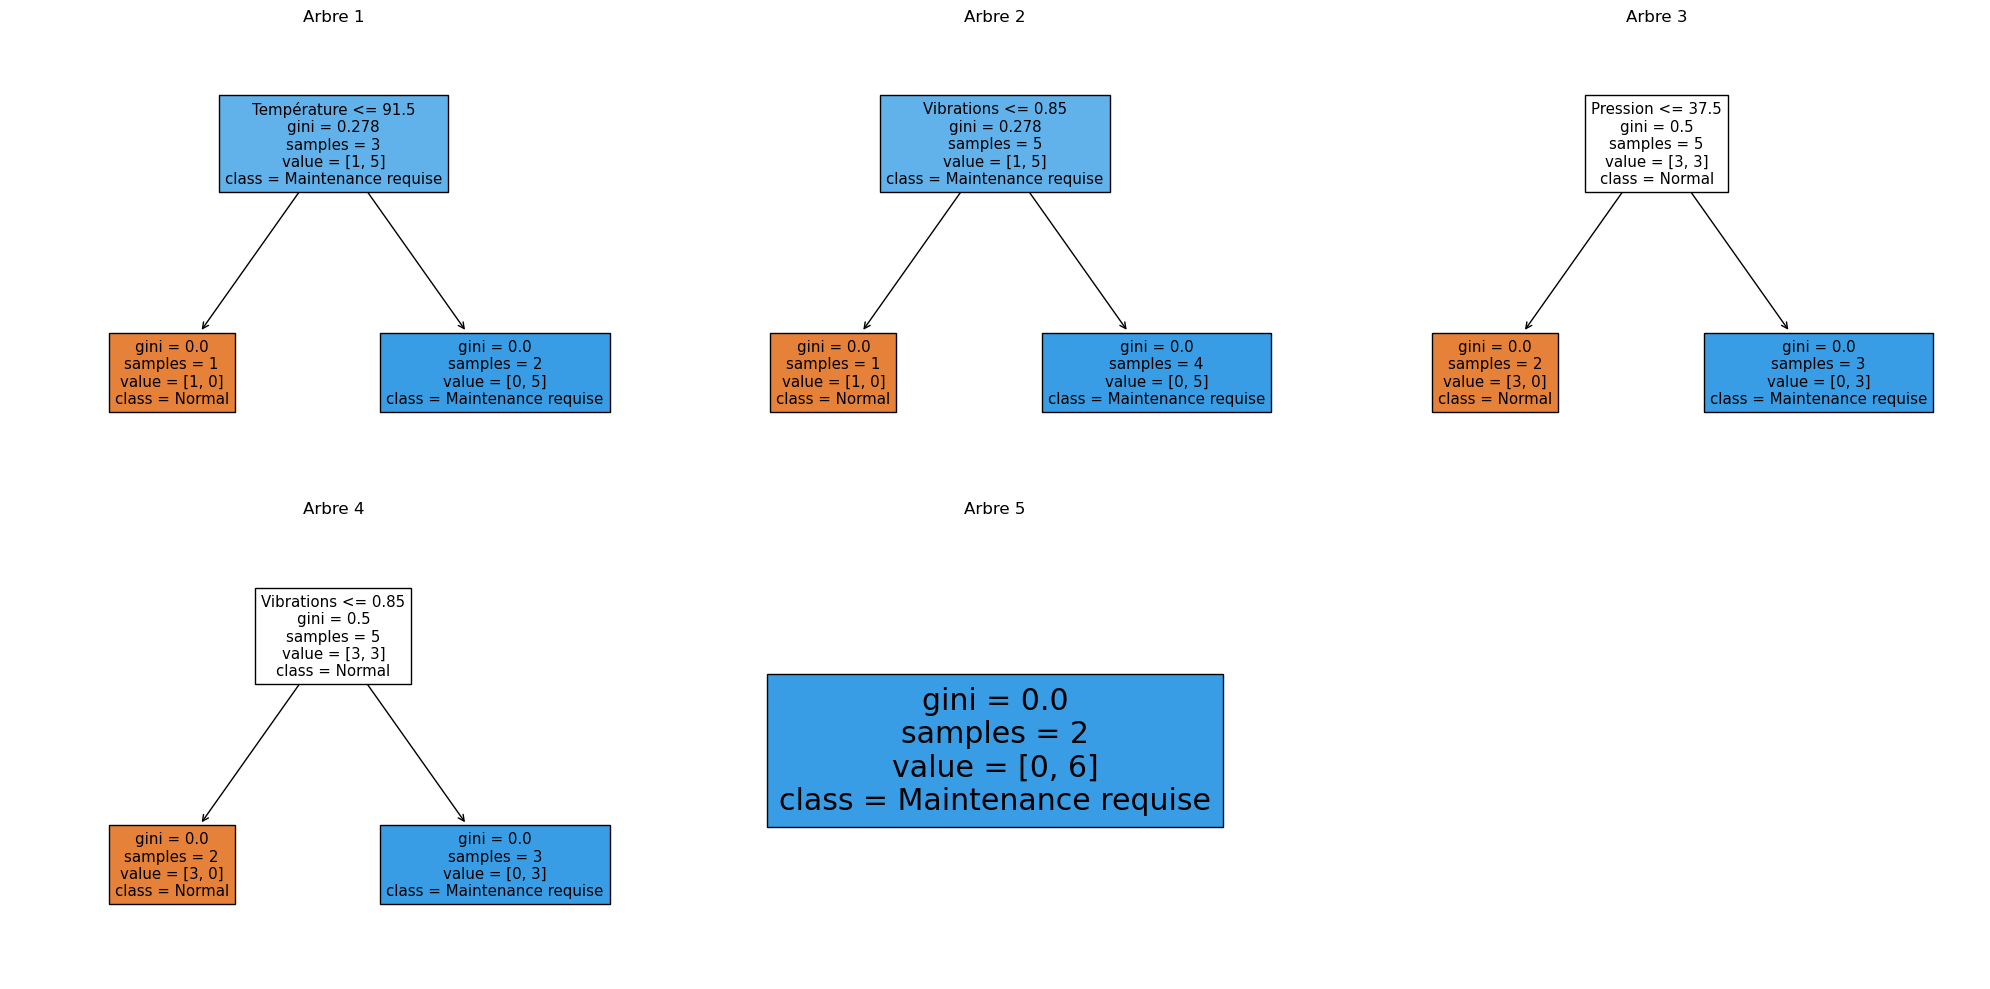

In [59]:
# Création d'une grille de subplots : ajustez nrows et ncols selon le nombre d'arbres à afficher
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))  # Plus de subplots pour éviter l'erreur
axes = axes.flatten()  # Aplatir le tableau d'axes pour un indexage facile

# Tracer les 5 premiers arbres (ajustez cela selon vos besoins)
for i in range(5):  # Changer ici selon le nombre d'arbres que vous voulez afficher
    plot_tree(model.estimators_[i], feature_names=['Température', 'Pression', 'Vibrations'],
              class_names=['Normal', 'Maintenance requise'], filled=True, ax=axes[i])
    axes[i].set_title(f'Arbre {i + 1}')

# Enlever les subplots vides si nécessaire
for j in range(5, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [58]:
# Supposons que X_test est votre ensemble de données de test
# model est votre modèle de forêt aléatoire déjà entraîné

# Obtenir les probabilités pour la classe "Maintenance requise"
probabilities = model.predict_proba(X)[:, 1]  # indice 1 pour "Maintenance requise"

# Décider basé sur un seuil de probabilité
decisions = probabilities > 0.70  # Retourne True pour maintenance requise si probabilité > 70%

print(probabilities)
print(decisions)

[0.2 0.2 0.9 0.9 1.  1. ]
[False False  True  True  True  True]
